In [45]:
import numpy as np
import matplotlib as plt
import pandas as pd
from pandas_profiling import ProfileReport

df  = catalog.load("clean_wig_data")
df.head()

2020-10-03 15:06:07,153 - kedro.io.data_catalog - INFO - Loading data from `clean_wig_data` (CSVDataSet)...


,year,code,countryname,vae,pve,gee,rqe,rle,cce
0,1996,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN
3,2002,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN
4,2003,ABW,Aruba,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         4494 non-null   int64  
 1   code         4494 non-null   object 
 2   countryname  4494 non-null   object 
 3   vae          4344 non-null   float64
 4   pve          4323 non-null   float64
 5   gee          4307 non-null   float64
 6   rqe          4307 non-null   float64
 7   rle          4379 non-null   float64
 8   cce          4321 non-null   float64
 9   exp_val      4494 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 351.2+ KB


0        0.416667
1        0.454545
2        0.500000
3        0.555556
4        0.588235
          ...    
4489     2.000000
4490     2.500000
4491     3.333333
4492     5.000000
4493    10.000000
Name: exp_val, Length: 4494, dtype: float64

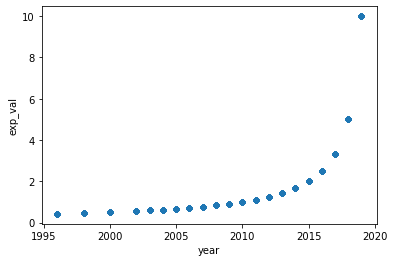

In [51]:


df.info()
df.year.describe()
np.abs(np.arange(1996, 2019) - 2019)
df["exp_val"] = 10/np.abs(2020 - df["year"])
df.plot("year", "exp_val", kind = "scatter")
df["exp_val"]

In [47]:
pf = ProfileReport(df)
pf.to_widgets()


In [39]:
df["vae"] = df["vae"] * df["exp_val"]
df["pve"] = df["pve"] * df["exp_val"]
df["gee"] = df["gee"] * df["exp_val"]
df["rqe"] = df["rqe"] * df["exp_val"]
df["rle"] = df["rle"] * df["exp_val"]
df["cce"] = df["cce"] * df["exp_val"]



In [52]:
df.groupby(["code","countryname"]).agg({"vae": "sum",
"pve": "sum",
"gee": "sum",
"rqe": "sum",
"rle": "sum",
"cce": "sum"})

,,vae,pve,gee,rqe,rle,cce
code,countryname,,,,,,
ABW,Aruba,18.942534,20.105748,18.562952,17.941266,18.557664,19.226894
ADO,Andorra,28.293651,28.084854,33.353524,27.522884,27.692124,26.845879
AFG,Afghanistan,-27.141311,-51.786677,-30.896522,-31.809867,-35.670107,-30.074487
AGO,Angola,-24.853571,-16.343417,-23.948097,-24.213176,-27.883189,-27.547790
AIA,Anguilla,9.706387,19.878532,20.629680,18.165137,14.633844,19.781377
...,...,...,...,...,...,...,...
YEM,"Yemen, Rep.",-26.254652,-43.191418,-25.185703,-18.625317,-27.710182,-24.612379
ZAF,South Africa,13.816327,-3.097508,10.477136,9.052414,2.325228,4.997292
ZAR,"Congo, Dem. Rep.",-30.841217,-46.472093,-34.443813,-32.023430,-35.314728,-29.884780


In [ ]:
df2 = catalog.load("")